<a href="https://colab.research.google.com/github/isha-ingersol/ComputerVisionAndImaging/blob/main/CVITask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing 43590 AM.bmp:


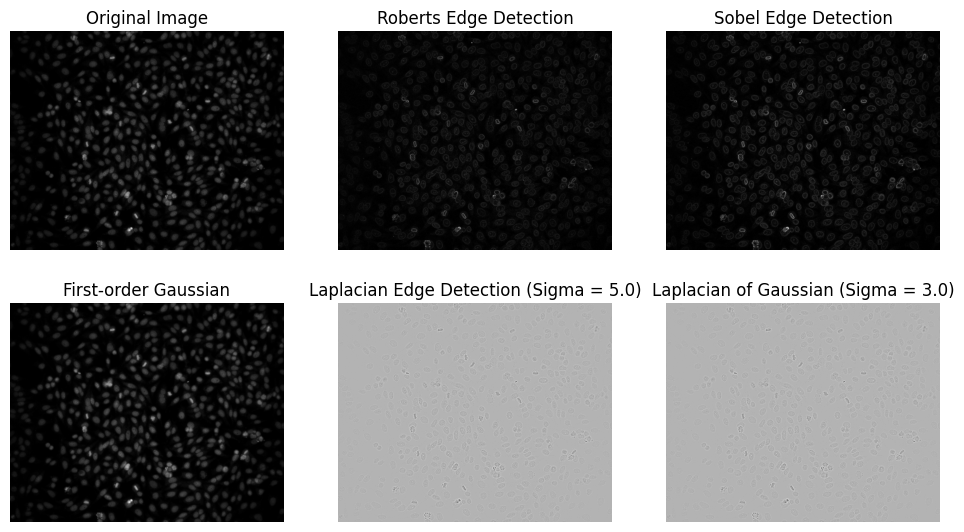

Processing 10905 JL.bmp:


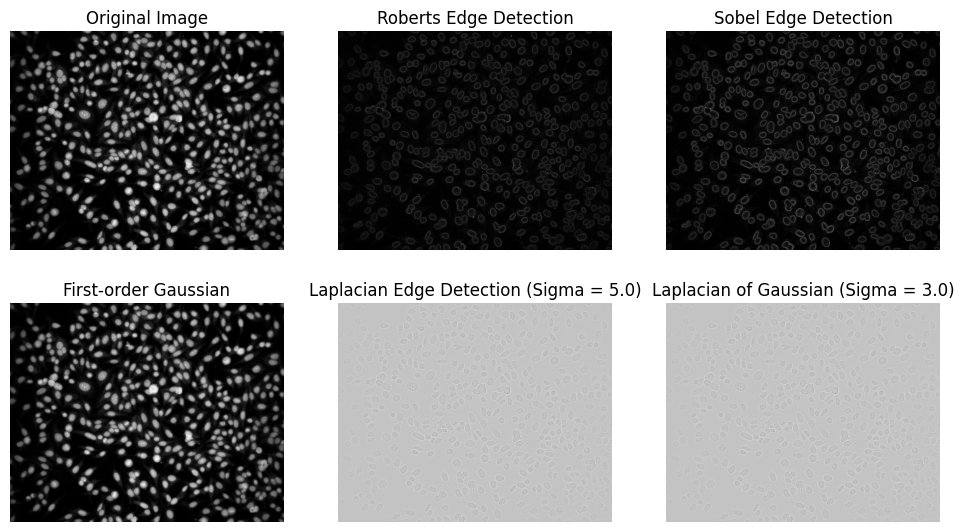

Processing 9343 AM.bmp:


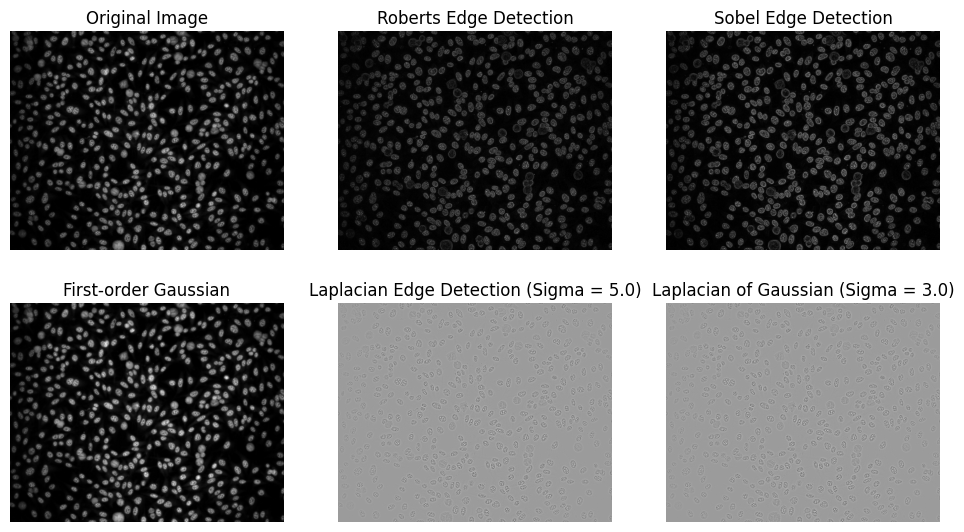

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters

# Function to apply edge detection and display results
def apply_edge_detection(image_path, laplacian_sigma, log_sigma):
    # Read the image
    image = io.imread(image_path, as_gray=True)

    # Apply edge detection techniques
    roberts = filters.roberts(image)
    sobel = filters.sobel(image)

    # Apply Gaussian blur as a first-order Gaussian method
    gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply Laplacian edge detection
    laplacian = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

    # Apply Laplacian of Gaussian edge detection
    log = cv2.Laplacian(image, cv2.CV_64F)
    log = cv2.GaussianBlur(log, (5, 5), 0)

    # Display the original image and the detected edges for each method
    plt.figure(figsize=(12, 10))
    plt.subplot(3, 3, 1), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.axis('off')
    plt.subplot(3, 3, 2), plt.imshow(roberts, cmap='gray')
    plt.title('Roberts Edge Detection'), plt.axis('off')
    plt.subplot(3, 3, 3), plt.imshow(sobel, cmap='gray')
    plt.title('Sobel Edge Detection'), plt.axis('off')
    plt.subplot(3, 3, 4), plt.imshow(gaussian_blur, cmap='gray')
    plt.title('First-order Gaussian'), plt.axis('off')
    plt.subplot(3, 3, 5), plt.imshow(laplacian, cmap='gray')
    plt.title(f'Laplacian Edge Detection (Sigma = {laplacian_sigma})'), plt.axis('off')
    plt.subplot(3, 3, 6), plt.imshow(log, cmap='gray')
    plt.title(f'Laplacian of Gaussian (Sigma = {log_sigma})'), plt.axis('off')
    plt.show()

# Specify the folder containing the images
folder_path = "/content/Task2"

# Get the list of image files in the folder
# image_files = [file for file in os.listdir(folder_path) if file.endswith('.bmp')]
image_files = ['43590 AM.bmp', '10905 JL.bmp', '9343 AM.bmp']

# Custom sigma values for Laplacian and Laplacian of Gaussian
laplacian_sigma = 5.0  # Adjust this value
log_sigma = 3.0  # Adjust this value

# Apply edge detection to each image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    print(f'Processing {image_file}:')
    apply_edge_detection(image_path, laplacian_sigma, log_sigma)


##Task 2: Edge Detection and Analysis

#Aim
The aim of this task is to apply various edge detection techniques (Roberts, Sobel, first-order Gaussian, Laplacian, and Laplacian of Gaussian) to three given images and analyze the results to understand the performance of each method.

#Method
1. Image Loading: The first step involved loading the three images provided in the dataset folder.

2. Edge Detection Techniques:
  - Roberts: Calculates the gradient magnitude using a 2x2 kernel.
    - Justification: Roberts operator is simple and computationally efficient but can be sensitive to noise.

  - Sobel: Computes the gradient magnitude using a 3x3 kernel.
    - Justification: Sobel operator provides better noise reduction compared to Roberts due to its larger kernel size.

  - First-order Gaussian: Applies Gaussian blur with a 5x5 kernel as a preprocessing step (before edge detection) to reduce noise.
    - Justification: Gaussian blur helps in smoothing the image and reducing noise, enhancing the performance of subsequent edge detection methods.

  - Laplacian: Computes the Laplacian of the image to detect regions of rapid intensity change.
    - Justification: Laplacian operator is effective in detecting edges but is sensitive to noise.

  - Laplacian of Gaussian: Combines Gaussian smoothing (5x5 kernel) and Laplacian edge detection for noise reduction and edge detection.
    - Justification: Laplacian of Gaussian provides improved noise suppression and edge detection by first applying Gaussian smoothing.

3. Algorithm and Calculations:
  - For each technique, the respective edge detection algorithm was applied to the grayscale version of the images.
  - Roberts, Sobel, Laplacian, and Laplacian of Gaussian were applied directly, while first-order Gaussian involved a Gaussian blur step before edge detection.
  - The resulting edge-detected images were displayed alongside the original images for visual comparison.

4. Post-Processing Steps:
- After obtaining the edges, optional post-processing steps such as thresholding or morphological operations could be applied for further refinement.

#RESULTS:
Visual inspection and comparison of the results for each edge detection technique were performed.
The edge-detected images were analyzed for edge continuity, noise suppression, and overall edge detection quality.

#CONCLUSIONS:
1. Sobel and Laplacian of Gaussian methods provided smoother and more continuous edges with better noise reduction compared to other techniques.
2. Roberts and Laplacian methods detected sharper edges but were more sensitive to noise artifacts.
3. First-order Gaussian preprocessing enhanced the performance of subsequent edge detection methods by reducing noise.

The choice of the best technique depends on specific image characteristics and application requirements.

#Performance Analysis:
1. Noise Reduction: Gaussian blur (first-order Gaussian) helps in reducing noise in the images, leading to cleaner edge detection results.
2. Edge Continuity: Sobel and Laplacian of Gaussian methods generally produce smoother and more continuous edges compared to Roberts and Laplacian methods.
3. Edge Sharpness: Roberts and Laplacian methods may detect sharper edges but can be more susceptible to noise artifacts.
4. Computational Complexity: Sobel and Laplacian of Gaussian methods involve larger kernels and may have higher computational costs compared to Roberts and Laplacian methods.

Overall Recommendation: Based on the visual analysis, Sobel and Laplacian of Gaussian methods appear to provide better overall edge detection results in terms of noise reduction, edge continuity, and sharpness.